# LowLou

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pyvista as pv
from tvtk.api import tvtk, write_data

from zpinn.lowloumag import LowLouMag
from zpinn.pinn_nf2_visualization import draw_grid

In [ ]:
Nx = 128
Ny = 128
Nz = 128

n = 1
m = 1
l = 0.3
Phi = np.pi/2

In [ ]:
input_path = '01_input/lowlou_128128128/'
vtk_path = os.path.join(input_path, 'b.vtk')
bottom_npy_path = os.path.join(input_path, 'b_bottom.npy')

## Calculate

In [ ]:
lowlou = LowLouMag(bounds=[-1,1,-1,1,0,2], 
              resolutions=[Nx, Ny, Nz], 
              n=n, m=m, l=l, Phi=Phi, 
              abs=True)
lowlou.calculate()
lowlou.grid.save(vtk_path)

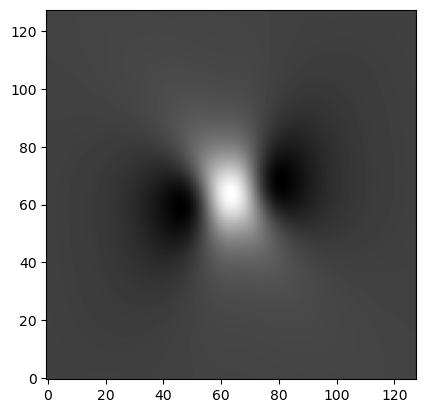

In [ ]:
b_bottom = np.array(lowlou.b_bottom)
plt.imshow(b_bottom[:, :, 2].transpose(), origin='lower', cmap='gray')

with open(bottom_npy_path, 'wb') as f:
        np.save(f, b_bottom)

## Viz

In [ ]:
pv.set_jupyter_backend('static')

In [ ]:
b_mesh = pv.read(vtk_path)
b_mesh

ImageData (0x7ff58e2b3340)
  N Cells:      2048383
  N Points:     2097152
  X Bounds:     -1.000e+00, 1.000e+00
  Y Bounds:     -1.000e+00, 1.000e+00
  Z Bounds:     0.000e+00, 2.000e+00
  Dimensions:   128, 128, 128
  Spacing:      1.575e-02, 1.575e-02, 1.575e-02
  N Arrays:     3

In [ ]:
b_grid = draw_grid(b_mesh)

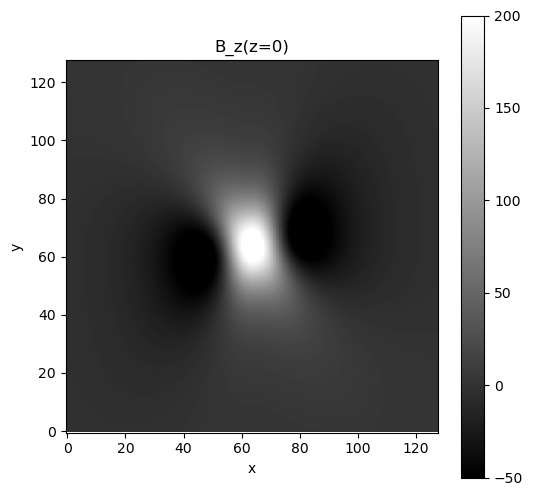

In [ ]:
b_grid.plt_Bz_imshow(z=0, vmin=-50, vmax=200)

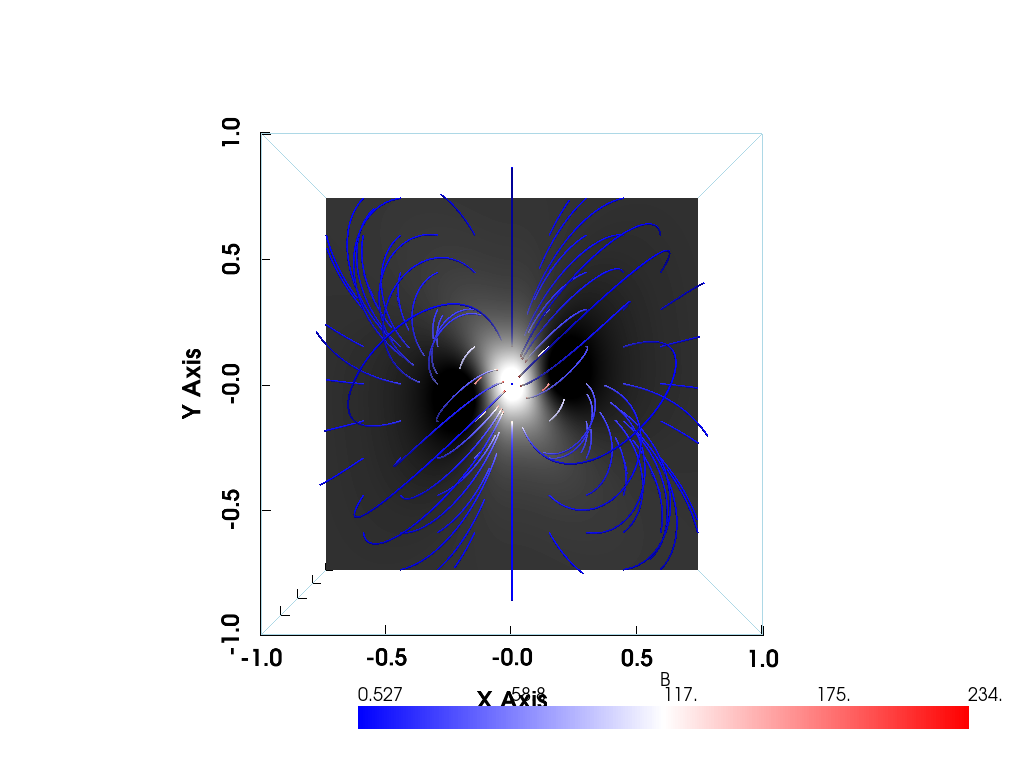

In [ ]:
b_grid.pv_streamline_Bz(camera_position='xy', i_resolution=10, j_resolution=10, vmin=-50, vmax=200)